# Importing Libraries


In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import os
import warnings


In [191]:
#suppress all warning
warnings.filterwarnings("ignore")

# Loading Data Set

In [192]:
#using locally stored dataset
df=pd.read_csv('data/RTA Dataset.csv')

In [193]:
#load the data from the github repo
# df=pd.read_csv('https://raw.githubusercontent.com/Teshager21/accident-analysis-addis_ababa/refs/heads/main/data/RTA%20Dataset.csv')

In [194]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


# Exploratory Data Analysis

### <i>Initial Exploration</i>

In [195]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [196]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [197]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
2889,8:59:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,NaN,Owner,2-5yrs,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Driving to the left,Fatal injury
10681,13:45:00,Sunday,Under 18,Male,Junior high school,Employee,2-5yr,Public (12 seats),Owner,2-5yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
8810,17:35:00,Wednesday,18-30,Male,Junior high school,Employee,Below 1yr,Other,Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
3810,13:00:00,Saturday,31-50,Male,NaN,Owner,NaN,NaN,Owner,Above 10yr,...,Reversing,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
9340,7:50:00,Wednesday,18-30,Male,Junior high school,Employee,1-2yr,Pick up upto 10Q,Owner,Above 10yr,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
1549,20:30:00,Wednesday,31-50,Male,Junior high school,Employee,Below 1yr,Stationwagen,Owner,Unknown,...,Going straight,Pedestrian,Male,Over 51,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
2974,19:00:00,Friday,31-50,Male,NaN,NaN,NaN,Automobile,Owner,Unknown,...,Reversing,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
1569,13:02:00,Sunday,18-30,Male,Junior high school,Employee,1-2yr,Stationwagen,Owner,Unknown,...,Going straight,Driver or rider,Male,Under 18,3,Other,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
9184,17:58:00,Monday,18-30,Male,Junior high school,Employee,5-10yr,Public (12 seats),Owner,Unknown,...,Moving Backward,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
671,17:50:00,Monday,Over 51,Male,Junior high school,Employee,2-5yr,Lorry (41?100Q),Owner,5-10yrs,...,Parked,Pedestrian,Male,Under 18,2,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury


In [198]:
df.shape

(12316, 32)

In [199]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

#### Rename Columns- use small letters for column names

In [200]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}

In [201]:
df.rename(columns=col_map,inplace=True)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [203]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [204]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883


<b>Missing Values</b>

In [205]:
df.isna().sum().sort_values(ascending=False)[df.isna().sum()>0]

vehicle_defect             4427
service_year               3928
casualty_work              3198
casualty_fitness           2635
vehicle_type                950
junction_type               887
driving_experience          829
educational_level           741
vehicle_driver_relation     579
vehicle_owner               482
lanes                       385
vehicle_movement            308
accident_area               239
surface_type                172
collision_type              155
road_allignment             142
dtype: int64

In [206]:
#missing values in numerical data
df.select_dtypes(exclude=['O']).isna().sum()

vehicles_involved    0
casualties           0
dtype: int64

In [207]:
#Missing values in percentage
missing_percentages=df.isnull().sum().sort_values(ascending=False)*100/len(df)
missing_percentages[missing_percentages>0]

vehicle_defect             35.945112
service_year               31.893472
casualty_work              25.966223
casualty_fitness           21.394933
vehicle_type                7.713543
junction_type               7.202014
driving_experience          6.731082
educational_level           6.016564
vehicle_driver_relation     4.701202
vehicle_owner               3.913608
lanes                       3.126015
vehicle_movement            2.500812
accident_area               1.940565
surface_type                1.396557
collision_type              1.258525
road_allignment             1.152972
dtype: float64

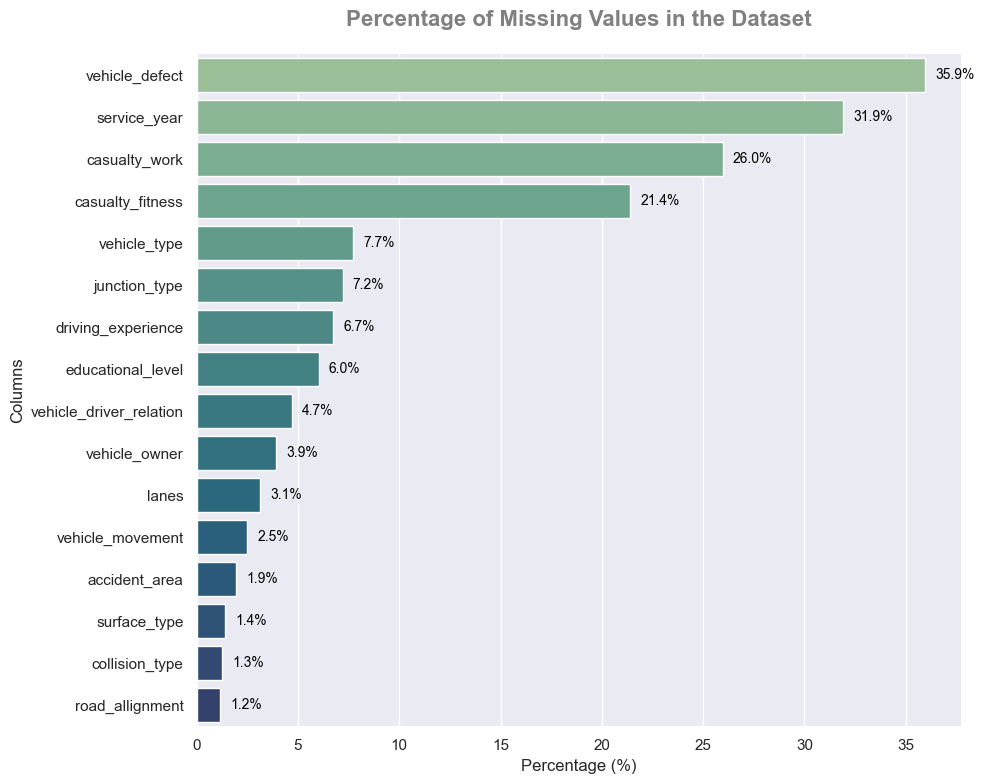

In [208]:
missing_data = missing_percentages[missing_percentages > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    y=missing_data.index,
    x=missing_data.values,
    palette="crest"
)

# Add title and labels
plt.title("Percentage of Missing Values in the Dataset", fontsize=16, fontweight="bold", color="gray", pad=20)
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Columns", fontsize=12)

# Add percentage annotations on bars
for index, value in enumerate(missing_data.values):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', ha='left', fontsize=10, color="black")

# Remove legend (not needed)
plt.legend([], [], frameon=False)

# Improve layout and aesthetics
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

<b>Missingness</b>

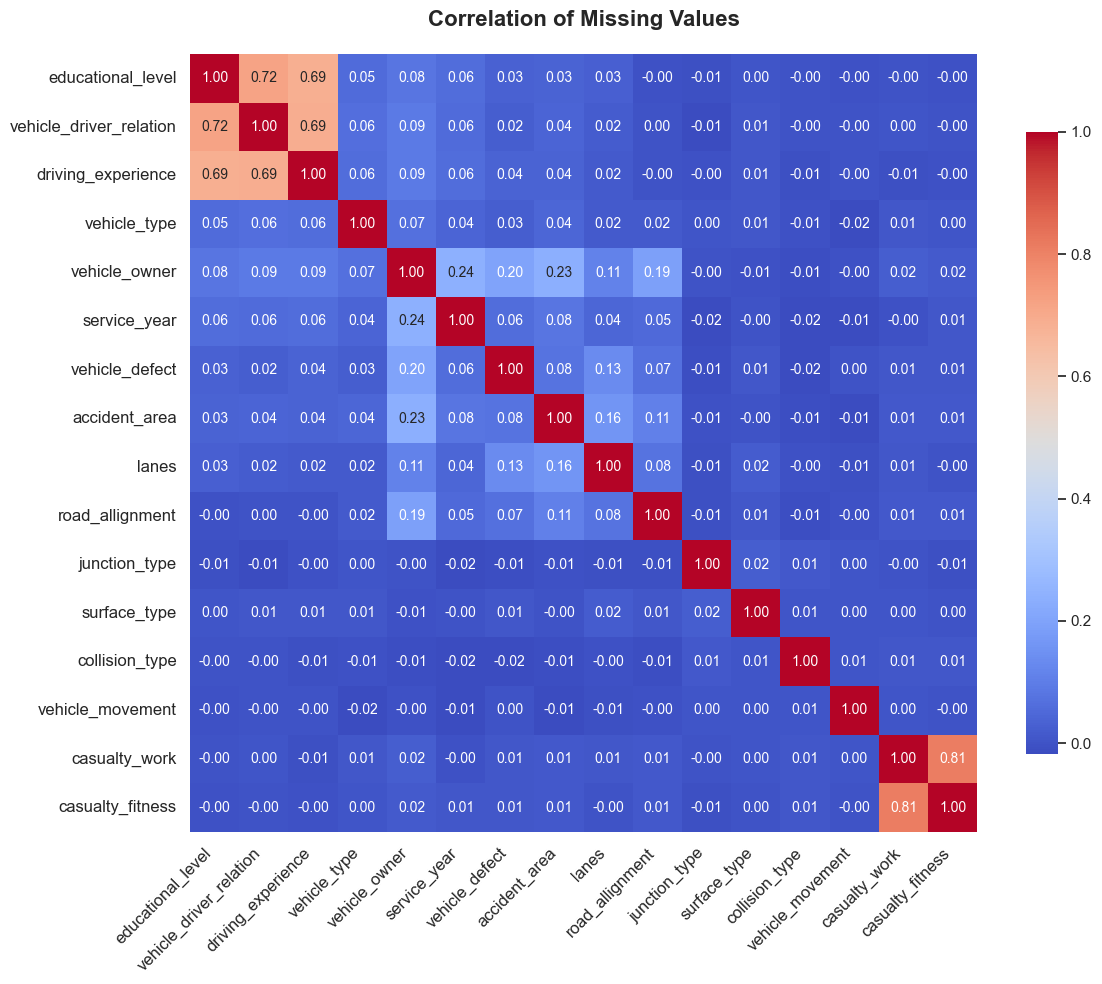

In [209]:
missingness = df.isnull().astype(int)
missingness = missingness.loc[:, (missingness.sum(axis=0) > 0)]
correlation_matrix = missingness.corr()

# Increase plot size and apply Seaborn theme
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.8}
)

# Add title and adjust axis labels
plt.title("Correlation of Missing Values", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

<b>Duplicated Values</b>

In [210]:
print(df.duplicated().sum())

0


<b>#Unique Values per Columns</b>

In [211]:
df.nunique().sort_values(ascending=False)

time                       1074
accident_cause               20
vehicle_type                 17
accident_area                14
vehicle_movement             13
collision_type               10
weather_condition             9
road_allignment               9
pedestrian_movement           9
junction_type                 8
casualties                    8
casualty_work                 7
lanes                         7
driving_experience            7
educational_level             7
day_of_week                   7
casualty_age                  6
vehicles_involved             6
service_year                  6
casualty_fitness              5
surface_type                  5
driver_age                    5
vehicle_driver_relation       4
vehicle_owner                 4
casualty_class                4
casualty_severity             4
light_condition               4
road_surface_conditions       4
vehicle_defect                3
driver_sex                    3
casualty_sex                  3
accident

<b>Distinct Values</b>

In [212]:
uniques=[]
for i in df.columns:
     uniques.append(df[i].unique())
uniques_df=pd.Series(data=uniques,index=df.columns)
uniques_df

time                       [17:02:00, 1:06:00, 14:15:00, 17:30:00, 17:20:...
day_of_week                [Monday, Sunday, Friday, Wednesday, Saturday, ...
driver_age                        [18-30, 31-50, Under 18, Over 51, Unknown]
driver_sex                                           [Male, Female, Unknown]
educational_level          [Above high school, Junior high school, nan, E...
vehicle_driver_relation               [Employee, Unknown, Owner, nan, Other]
driving_experience         [1-2yr, Above 10yr, 5-10yr, 2-5yr, nan, No Lic...
vehicle_type               [Automobile, Public (> 45 seats), Lorry (41?10...
vehicle_owner                [Owner, Governmental, nan, Organization, Other]
service_year               [Above 10yr, 5-10yrs, nan, 1-2yr, 2-5yrs, Unkn...
vehicle_defect                                        [No defect, nan, 7, 5]
accident_area              [Residential areas, Office areas,   Recreation...
lanes                      [nan, Undivided Two way, other, Double carriag...

array([[<Axes: title={'center': 'vehicles_involved'}>,
        <Axes: title={'center': 'casualties'}>]], dtype=object)

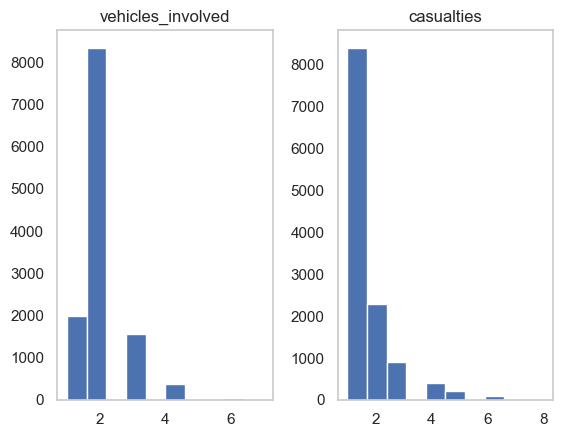

In [213]:
df.hist(grid=False)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

<b>Skewness</b>

In [244]:
count_value= df['accident_severity'].value_counts()
print(count_value)

accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


In [245]:
proportions = count_value / count_value.sum()
print(proportions)


accident_severity
Slight Injury     0.845648
Serious Injury    0.141523
Fatal injury      0.012829
Name: count, dtype: float64


In [246]:
cv = np.std(proportions) / np.mean(proportions)
print(f"Coefficient of Variation: {cv}")

Coefficient of Variation: 1.09815368128082


<Axes: title={'center': 'Category Proportions'}, xlabel='accident_severity'>

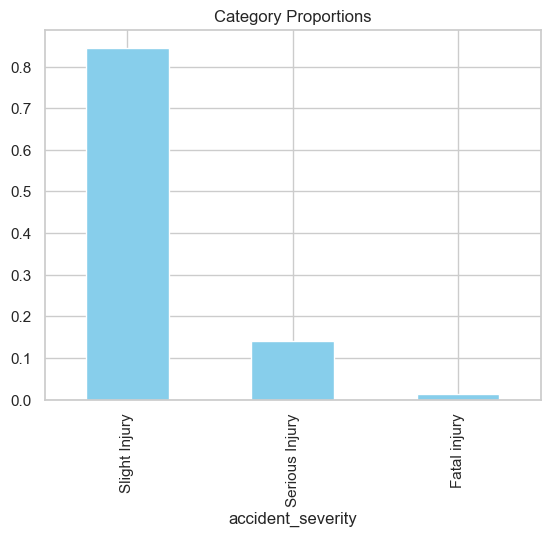

In [247]:
proportions.plot(kind='bar', color='skyblue', title='Category Proportions')

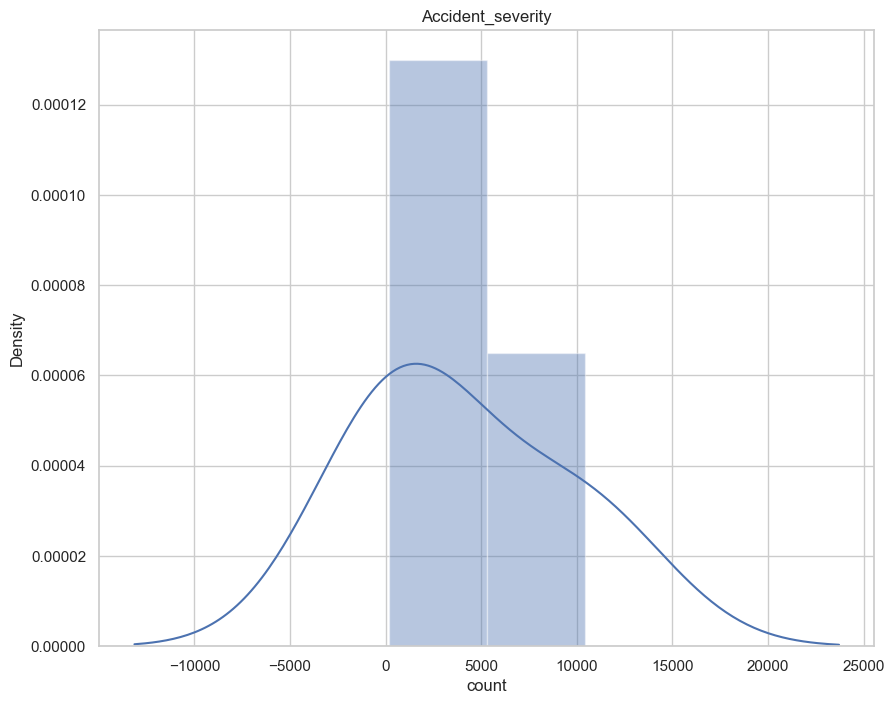

In [248]:
plt.figure(figsize= (10,8))
sns.distplot(count_value)
plt.title("Accident_severity")
plt.show()

### <i>Univariate Analysis</i>

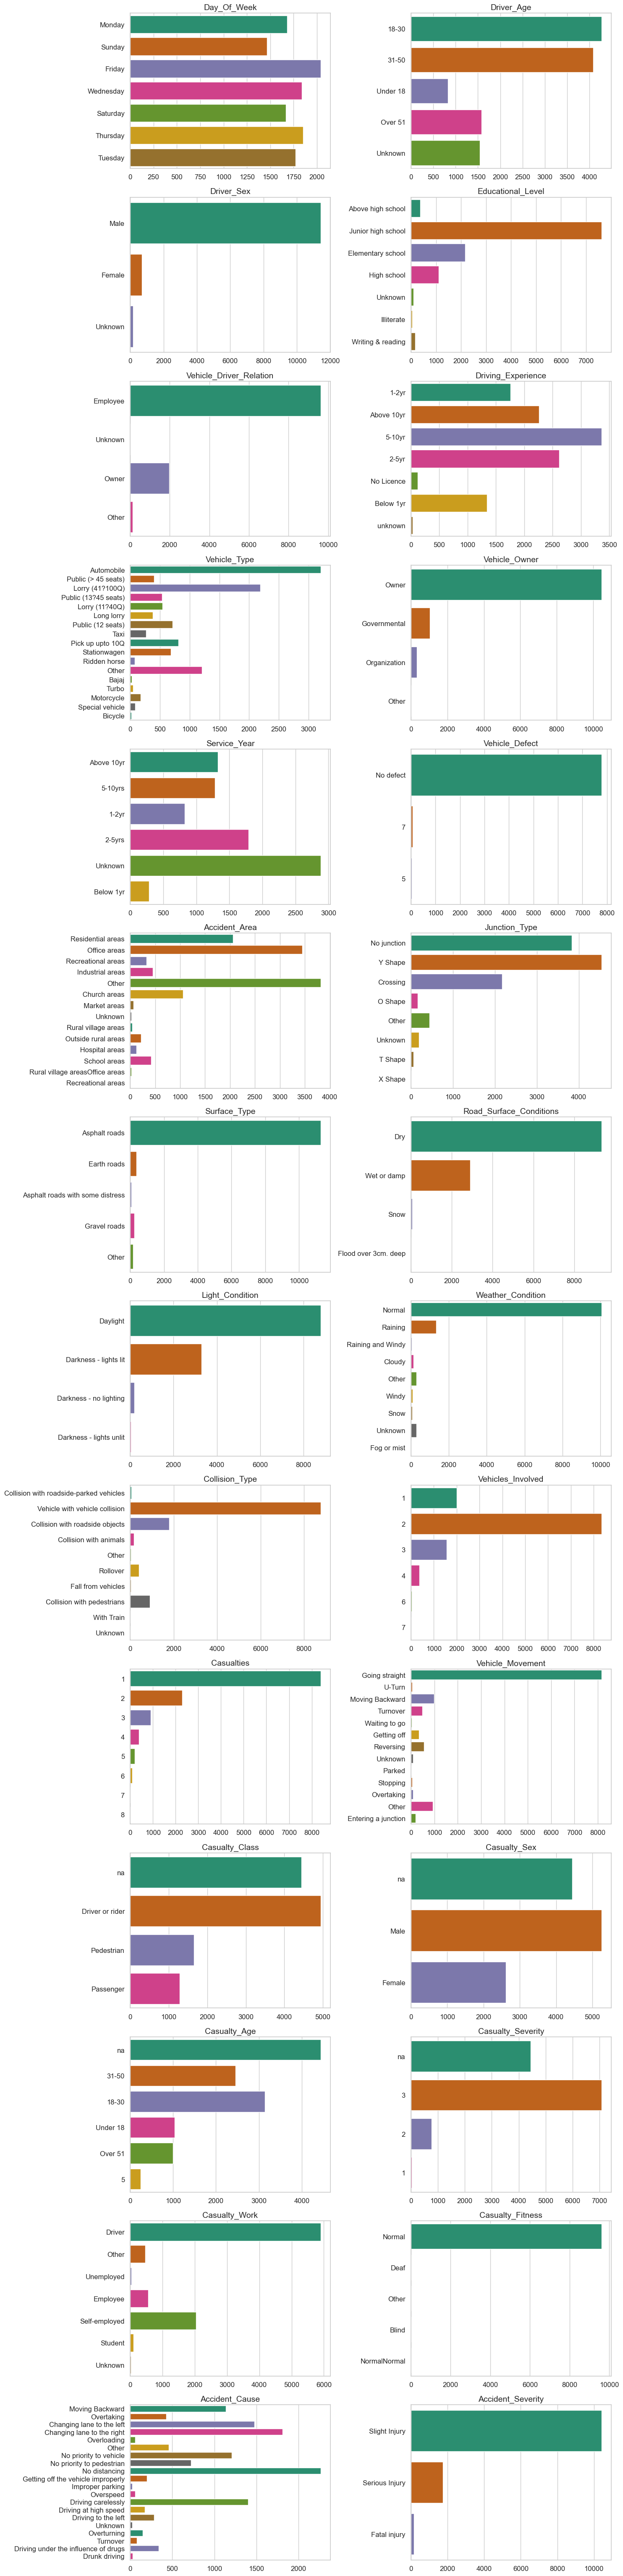

In [219]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['time', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

#### <i>Accident distribution through out the week days<i>

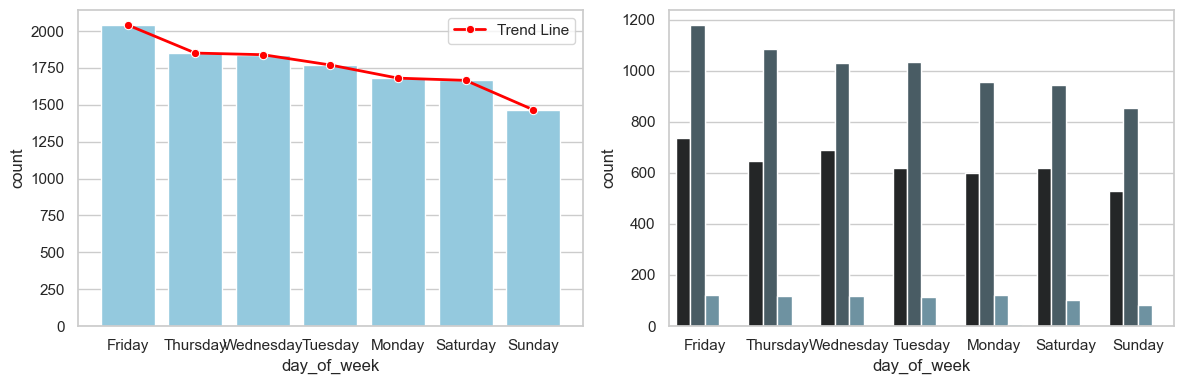

In [ ]:
# Calculate value counts for accidents per day and sort them in descending order
day_counts = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Sort the days based on accident count (descending order)
sorted_order = day_counts.sort_values(ascending=False).index

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Countplot ordered by accident frequency
sns.countplot(data=df, x='day_of_week', ax=axes[0], order=sorted_order, color='skyblue')

# Add trend line (optional)
sns.lineplot(x=sorted_order, y=day_counts[sorted_order], color='red', marker='o', label='Trend Line', linewidth=2, ax=axes[0])

# Second countplot with hue
sns.countplot(x='day_of_week', hue='casualty_severity', data=df, order=sorted_order, ax=axes[1], palette="viridis", legend=False)

#show the breakdown by accident severity
sns.countplot(x=df['day_of_week'],hue=df['casualty_severity'],order=cat_order,legend=False,ax=axes[1],color='skyblue')
# Tight layout
plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Friday is the most accident prone day of all the other days for all categories of accident severity
* The accident decreases from Friday to Thursday  then Wednesday right up to Sunday in an orderly fashion
    
</div>

#### <i>Accident distribution by hour<i>

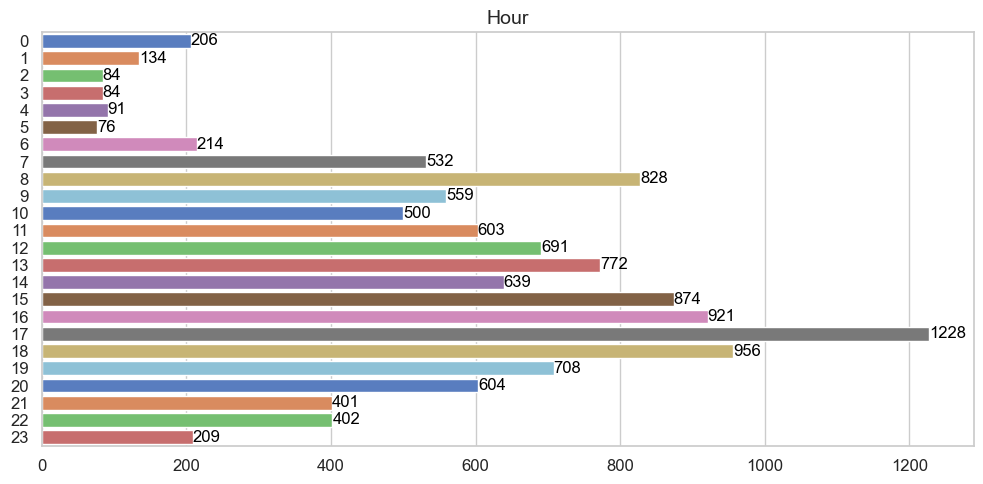

In [252]:
plt.figure(figsize=(10,5))
# hour_counts=pd.to_datetime(df['time'],format='%H:%M:%S').dt.hour.value_counts().sort_values(ascending=False).head(8)
# order=hour_counts.index
df['hour']=pd.to_datetime(df['time'],format='%H:%M:%S').dt.hour
ax=sns.countplot( data=df,y='hour',palette='muted')
# Adding annotations
for p in ax.patches:
    width = p.get_width()  # Get the width of each bar
    ax.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{int(width)}', 
            va='center', ha='left', fontsize=12, color='black')  # Display count
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
# Remove the 'hour' column after plotting
df.drop('hour', axis=1, inplace=True)
plt.tight_layout()


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

Most accidents happen around three critical peak hours:
* 8:00  - > Typical start  of work hour for offices,industries
* 13:00  - > Typical lunch hour
* 17:00 - > Typical Exit from work hour

Least accidents happen during the night period:
* From 23:00-5:00
    
</div>

#### Accident Area

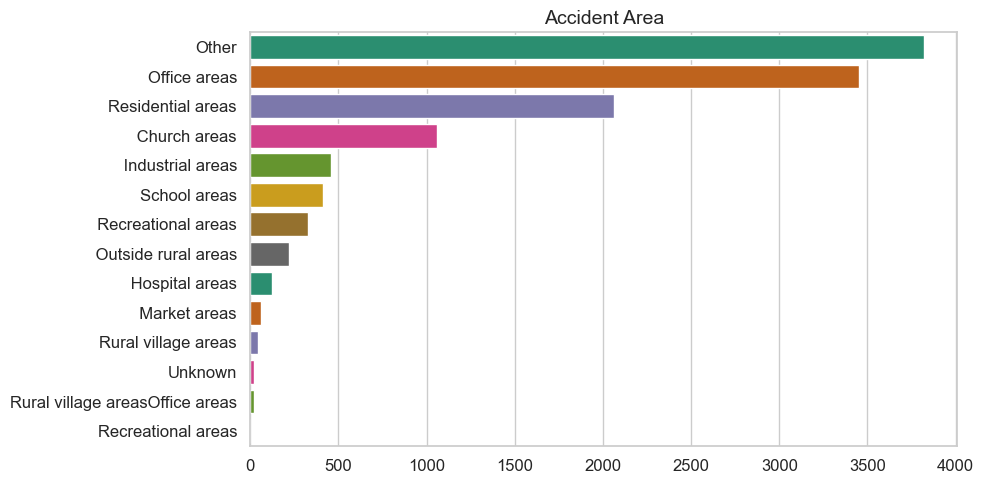

In [222]:
plt.figure(figsize=(10,5))
order=df['accident_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='accident_area', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accident Area', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### <i>Accident distribution through out the weekends<i>

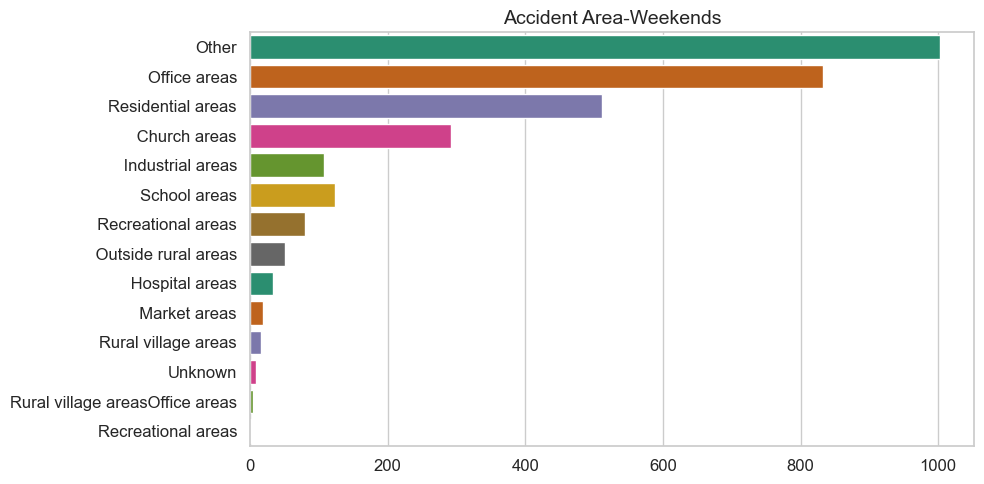

In [223]:
plt.figure(figsize=(10,5))

order=df['accident_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df_weekend, y='accident_area', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accident Area-Weekends', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### <i>Accident per Lanes<i>

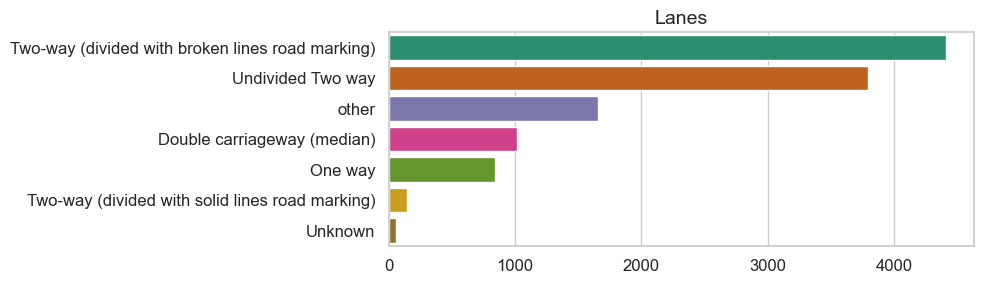

In [224]:
plt.figure(figsize=(10,3))
order=df['lanes'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='lanes', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### <i>Gender Constitution of Accidents<i>

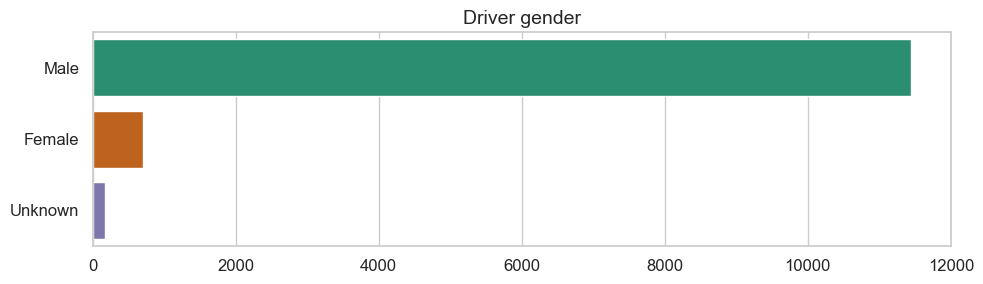

In [225]:
plt.figure(figsize=(10,3))
order=df['driver_sex'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='driver_sex', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Driver gender', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

### <i>Bivariate Analysis</i>

### <i>Multivariate Analysis</i>

In [226]:

from sklearn.feature_selection import mutual_info_classif

# Encode categorical features
df_encoded = df.apply(lambda col: col.astype('category').cat.codes)

# Mutual information
mi = mutual_info_classif(df_encoded.drop(columns="accident_severity"), df_encoded["accident_severity"], discrete_features=True)
mi_df = pd.DataFrame({
    'Feature': df_encoded.drop(columns="accident_severity").columns,
    'Mutual Information': mi
})
print(mi_df)


                    Feature  Mutual Information
0                      time            0.134564
1               day_of_week            0.001794
2                driver_age            0.002516
3                driver_sex            0.000252
4         educational_level            0.000438
5   vehicle_driver_relation            0.000261
6        driving_experience            0.000934
7              vehicle_type            0.001986
8             vehicle_owner            0.000292
9              service_year            0.000331
10           vehicle_defect            0.000276
11            accident_area            0.001927
12                    lanes            0.000637
13          road_allignment            0.000550
14            junction_type            0.002587
15             surface_type            0.000611
16  road_surface_conditions            0.000322
17          light_condition            0.001633
18        weather_condition            0.002291
19           collision_type            0

<Figure size 1500x1000 with 0 Axes>

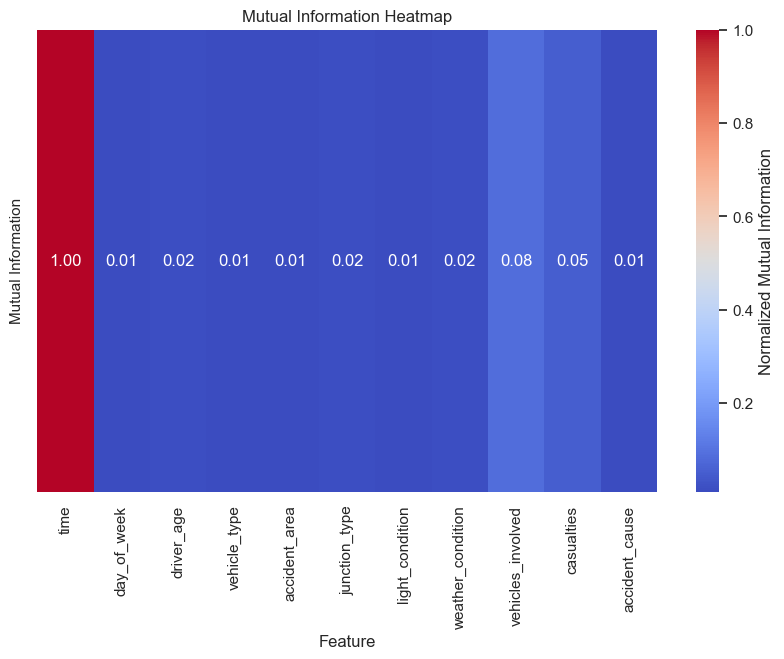

In [227]:
plt.figure(figsize=(15,10))
# sns.heatmap(mi,cmap="coolwarm")
# Plot Heatmap
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# Sample MI computation (use your dataset here)
target = "accident_severity"
mi = mutual_info_classif(df_encoded.drop(columns=target), df_encoded[target], discrete_features=True)

# Normalize MI values
mi_scaled = MinMaxScaler().fit_transform(mi.reshape(-1, 1)).flatten()

# Prepare DataFrame for visualization
mi_df = pd.DataFrame({
    'Feature': df_encoded.drop(columns=target).columns,
    'Mutual Information': mi_scaled
})

# Filter out low MI features
mi_df = mi_df[mi_df['Mutual Information'] > 0.01]

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    mi_df.set_index('Feature').T,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Normalized Mutual Information'}
)
plt.title("Mutual Information Heatmap")
plt.show()



# Preprocessing

### <i>Data Cleaning</i>

In [228]:
#copy data before any manipulation
df2=df.copy()

<b>Converting values to numbers</b>

In [229]:
#time
df2['time']=pd.to_datetime(df2['time'],format='%H:%M:%S')
df2['hour']=df2['time'].dt.hour
df2['minute']=df2['time'].dt.minute
df2[['time','hour','minute']].head()

#convert objects to numbers
df2['casualty_severity']=pd.to_numeric(df2['casualty_severity'],errors='coerce')

#drop the time feature
df2.drop(columns=['time'],inplace=True)
df2.dtypes

day_of_week                 object
driver_age                  object
driver_sex                  object
educational_level           object
vehicle_driver_relation     object
driving_experience          object
vehicle_type                object
vehicle_owner               object
service_year                object
vehicle_defect              object
accident_area               object
lanes                       object
road_allignment             object
junction_type               object
surface_type                object
road_surface_conditions     object
light_condition             object
weather_condition           object
collision_type              object
vehicles_involved            int64
casualties                   int64
vehicle_movement            object
casualty_class              object
casualty_sex                object
casualty_age                object
casualty_severity          float64
casualty_work               object
casualty_fitness            object
pedestrian_movement 

In [230]:
#replace unknown, Unknown and na with np.nan
df2.replace(['na','unknown','Unknown'], np.nan, inplace=True)
for col in df2:
    print(df2[col].unique())

['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
['18-30' '31-50' 'Under 18' 'Over 51' nan]
['Male' 'Female' nan]
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
['Employee' nan 'Owner' 'Other']
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr']
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
['Owner' 'Governmental' nan 'Organization' 'Other']
['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Below 1yr']
['No defect' nan '7' '5']
['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' nan 'Other' ' Church areas' '  Market areas'
 'Rural village areas' ' Outside rural areas' ' Hospital areas'
 'School areas' 'Rural village areasOffice areas' 'Recreational 

**Encoding**

In [231]:
df2['hour'].dtype

dtype('int32')

In [232]:
#segreggate nominal and ordinal features
nominal_features=['day_of_week', 'driver_sex','vehicle_driver_relation', 'vehicle_type','vehicle_owner', 'vehicle_defect', 'accident_area','lanes', 'road_allignment',
                   'junction_type', 'surface_type','road_surface_conditions', 'light_condition', 'weather_condition', 'collision_type', 'vehicle_movement','casualty_class', 
                   'casualty_sex', 'casualty_fitness', 'casualty_work', 'pedestrian_movement','accident_cause']
ordinal_features=['driver_age', 'educational_level', 'driving_experience', 'service_year', 'casualty_age', 'accident_severity']
len(nominal_features)+len(ordinal_features)

28

In [233]:
#inspect ordinal feature values
for col in ordinal_features:
    print(col ," : ",df[col].unique())

driver_age  :  ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
educational_level  :  ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
driving_experience  :  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
service_year  :  ['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']
casualty_age  :  ['na' '31-50' '18-30' 'Under 18' 'Over 51' '5']
accident_severity  :  ['Slight Injury' 'Serious Injury' 'Fatal injury']


In [234]:
#where casualty_age is equal to 5
df2[df2['casualty_age']==5]['casualty_age'].count()

np.int64(0)

In [235]:
#Create mappings and encode nominal features  in place
mappings = {}
for feature in nominal_features:
    unique_values = df2[feature].dropna().unique()
    mappings[feature] = {
        "original": {val: idx for idx, val in enumerate(unique_values)},
        "reverse": {idx: val for idx, val in enumerate(unique_values)}
    }
    df2[feature] = df2[feature].map(mappings[feature]["original"])
    df2.sample(10)


In [236]:
#Ordinal Encoding
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df2[ordinal_features] = df2[ordinal_features].fillna('missing')
df2[ordinal_features]=encoder.fit_transform(df2[ordinal_features])
missing_encoded_value = encoder.transform([['missing'] * len(ordinal_features)])[0]
for i, col in enumerate(ordinal_features):
     df2[col] = df2[col].replace(missing_encoded_value[i], np.nan)
encoded_df=df2.copy()

encoded_df.sample(5)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
10990,0,1.0,0.0,4.0,0.0,2.0,0.0,0.0,NaN,0.0,...,0.0,1.0,3.0,0.0,0.0,0,15.0,2.0,16,32
65,0,1.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,0.0,...,1.0,1.0,3.0,NaN,NaN,0,NaN,2.0,18,25
2238,1,2.0,0.0,2.0,1.0,1.0,3.0,0.0,3.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0,8.0,2.0,18,21
2876,0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0,12.0,2.0,8,55
7317,5,1.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,NaN,...,1.0,0.0,3.0,4.0,0.0,0,12.0,2.0,19,31


### Impute Missing Values

In [237]:
# imputed iteratively using Random Forest Classiffier as an estimator
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
imputer = IterativeImputer(estimator=rf, random_state=0)
imputed_data = imputer.fit_transform(encoded_df)
imputed_df = pd.DataFrame(imputed_data, columns=df2.columns)
imputed_df.sample(5)


,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
2699,5.0,0.0,0.0,4.0,0.0,2.0,11.0,0.0,1.0,0.0,...,1.0,1.0,3.0,4.0,0.0,0.0,8.0,2.0,19.0,7.0
2411,2.0,2.0,0.0,4.0,0.0,4.0,0.0,1.0,1.0,0.0,...,0.0,4.0,3.0,0.0,0.0,2.0,0.0,2.0,14.0,50.0
11652,4.0,3.0,0.0,4.0,0.0,2.0,8.0,0.0,1.0,0.0,...,0.0,1.0,3.0,4.0,0.0,0.0,8.0,1.0,23.0,35.0
6155,3.0,0.0,0.0,4.0,0.0,3.0,11.0,0.0,1.0,0.0,...,0.0,3.0,3.0,0.0,0.0,0.0,17.0,2.0,19.0,32.0
1310,2.0,1.0,0.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,...,1.0,3.0,3.0,0.0,0.0,0.0,3.0,2.0,16.0,22.0


In [238]:
#decoding nominal features
for feature in nominal_features:
    reverse_map = mappings[feature]["reverse"]
    valid_values = list(reverse_map.keys())

    # Round imputed values to the nearest valid integer
    imputed_df[feature] = imputed_df[feature].apply(
        lambda x: min(valid_values, key=lambda y: abs(x - y))
    )
    # Decode back to original categories
    imputed_df[feature] = imputed_df[feature].map(reverse_map)

imputed_df.sample(10)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
8547,Wednesday,1.0,Male,2.0,Employee,3.0,Taxi,Owner,1.0,No defect,...,Male,0.0,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,2.0,16.0,0.0
8942,Sunday,0.0,Male,0.0,Owner,0.0,Lorry (41?100Q),Owner,3.0,No defect,...,Male,1.0,2.0,Driver,Normal,Not a Pedestrian,Moving Backward,2.0,9.0,55.0
1096,Tuesday,1.0,Male,2.0,Owner,1.0,Automobile,Owner,1.0,No defect,...,Male,3.0,3.0,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,2.0,13.0,30.0
6683,Thursday,0.0,Male,4.0,Employee,4.0,Public (12 seats),Owner,0.0,No defect,...,Male,4.0,3.0,Driver,Normal,Unknown or other,No distancing,2.0,20.0,20.0
7695,Sunday,0.0,Male,4.0,Owner,0.0,Pick up upto 10Q,Owner,2.0,7,...,Female,3.0,3.0,Driver,Normal,Not a Pedestrian,No priority to vehicle,2.0,13.0,22.0
428,Sunday,0.0,Male,4.0,Employee,3.0,Automobile,Owner,1.0,No defect,...,Female,4.0,3.0,Driver,Normal,Not a Pedestrian,Driving carelessly,2.0,13.0,55.0
11300,Monday,2.0,Male,4.0,Employee,4.0,Automobile,Owner,1.0,No defect,...,Male,0.0,3.0,Driver,Normal,Not a Pedestrian,No distancing,2.0,19.0,40.0
9749,Friday,0.0,Male,4.0,Employee,0.0,Pick up upto 10Q,Owner,0.0,No defect,...,Male,0.0,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,2.0,4.0,0.0
3544,Saturday,2.0,Male,4.0,Owner,0.0,Public (12 seats),Governmental,1.0,No defect,...,Female,1.0,3.0,Driver,Normal,Not a Pedestrian,No priority to pedestrian,2.0,14.0,50.0
6305,Sunday,0.0,Male,4.0,Employee,3.0,Automobile,Owner,2.0,No defect,...,Male,1.0,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the left,1.0,3.0,0.0


In [239]:
# Decode Ordinal Features
ordinal_decoded = encoder.inverse_transform(imputed_df[ordinal_features])
for i, col in enumerate(ordinal_features):
    imputed_df[col] = ordinal_decoded[:, i]
imputed_df.sample(10)

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,...,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity,hour,minute
9985,Saturday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,1-2yr,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,14.0,0.0
1370,Friday,18-30,Male,Junior high school,Employee,1-2yr,Other,Owner,2-5yrs,No defect,...,Male,Over 51,3.0,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,19.0,35.0
3260,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Organization,2-5yrs,No defect,...,Female,31-50,2.0,Driver,Normal,Not a Pedestrian,Other,Slight Injury,8.0,5.0
5819,Tuesday,Under 18,Female,Junior high school,Employee,5-10yr,Stationwagen,Owner,Above 10yr,No defect,...,Female,31-50,3.0,Self-employed,Normal,Not a Pedestrian,No distancing,Serious Injury,18.0,0.0
6427,Tuesday,31-50,Female,Junior high school,Employee,Above 10yr,Pick up upto 10Q,Owner,2-5yrs,No defect,...,Female,31-50,3.0,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,13.0,54.0
2251,Monday,Over 51,Male,High school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury,14.0,32.0
6939,Saturday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Governmental,1-2yr,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,16.0,53.0
5359,Thursday,18-30,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Male,18-30,3.0,Other,Normal,Not a Pedestrian,No distancing,Slight Injury,8.0,40.0
2129,Thursday,18-30,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,5-10yrs,No defect,...,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,8.0,0.0
7792,Friday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Owner,2-5yrs,No defect,...,Male,Under 18,3.0,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,11.0,32.0


In [240]:
#check correct decoding
imputed_df['casualty_class'].isna().sum()
for col in imputed_df:
    print(col ," : ",imputed_df[col].unique())
imputed_decoded_df=imputed_df.copy()

day_of_week  :  ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
driver_age  :  ['18-30' '31-50' 'Under 18' 'Over 51']
driver_sex  :  ['Male' 'Female']
educational_level  :  ['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
vehicle_driver_relation  :  ['Employee' 'Owner' 'Other']
driving_experience  :  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr']
vehicle_type  :  ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
vehicle_owner  :  ['Owner' 'Governmental' 'Organization' 'Other']
service_year  :  ['Above 10yr' '5-10yrs' '2-5yrs' '1-2yr' 'Below 1yr']
vehicle_defect  :  ['No defect' '7' '5']
accident_area  :  ['Residential areas' 'Office areas' '  Recreational areas'
 ' Industrial areas' '

In [241]:
#save imputed_data
folder_path = "data"
file_name = "imputed_data.csv"
# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)
# Full path to the CSV file
file_path = os.path.join(folder_path, file_name)

# Save DataFrame to CSV (replace if it already exists)
imputed_decoded_df.to_csv(file_path, index=False)
print(f"File saved at: {file_path}")

File saved at: data\imputed_data.csv


### <i>Data Transformation</i>

### <i>Data Reduction</i>

# Insights and Recommendations